In [39]:
import pandas as pd

url = "https://drive.google.com/uc?export=download&id=1AJ0mM_4D5om7lSUKFD0htM3XtKrfmp2w"
df = pd.read_csv(url)

# Adding a new column named as global sales
df["Global__Sales"] = df["NA_Sales"] + df["EU_Sales"] + df["JP_Sales"] + df["Other_Sales"]

# Defining global sales in Descending order
df_sort = df.sort_values(by="Global__Sales", ascending=False)

print(df_sort.head())

                          Name Platform    Year         Genre Publisher  \
6109                Wii Sports      Wii  2006.0        Sports  Nintendo   
122          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
8315            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
9743         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
705   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global__Sales  
6109     41.49     29.02      3.77         8.46          82.74  
122      29.08      3.58      6.81         0.77          40.24  
8315     15.85     12.88      3.79         3.31          35.83  
9743     15.75     11.01      3.28         2.96          33.00  
705      11.27      8.89     10.22         1.00          31.38  


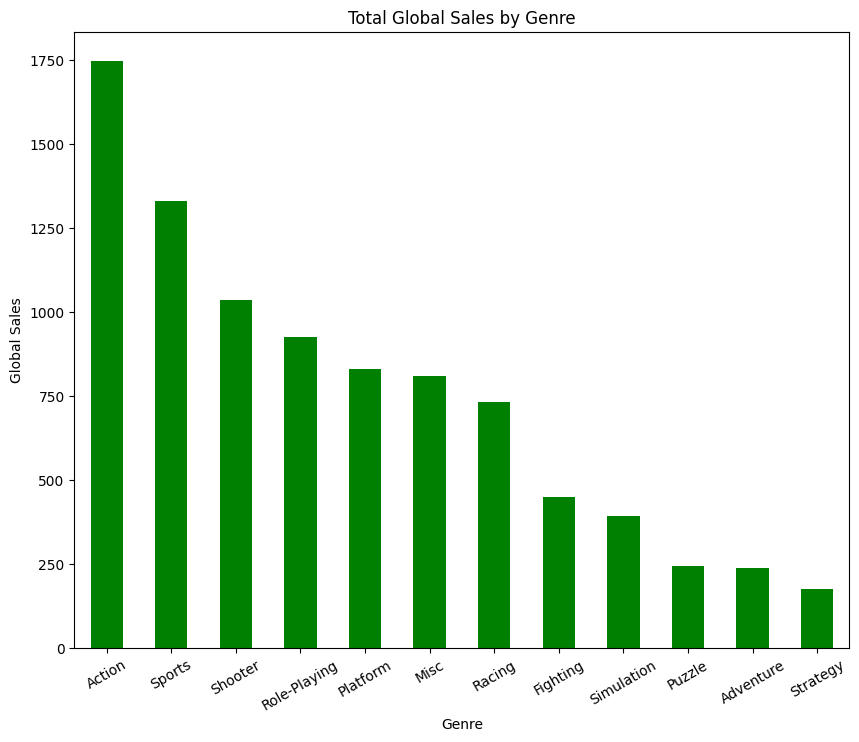

In [34]:
df["Global__Sales"] = df["NA_Sales"] + df["EU_Sales"] + df["JP_Sales"] + df["Other_Sales"]
# Group by Genre and sum the Global__Sales column
genre_sales = df.groupby("Genre")["Global__Sales"].sum()

genre_sales = genre_sales.sort_values(ascending=False)

import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10,8)) 
genre_sales.plot(kind="bar", color="green")

plt.title("Total Global Sales by Genre")  # title
plt.xlabel("Genre")  # x-axis label
plt.ylabel("Global Sales")  # y-axis label
plt.xticks(rotation=30)  
plt.show()

In [32]:
# rows with 'Name' including 'Grand Theft Auto'
gta_games = df[df["Name"].str.contains("Grand Theft Auto", case=False, na=False)]

gta_df = gta_games[["Name", "Platform", "Year"]].copy() 

#To find Europe and Japan sales
gta_df["EU_JP_Sales"] = gta_games["EU_Sales"] + gta_games["JP_Sales"]

print(gta_df)

                                                    Name Platform    Year  \
999                                     Grand Theft Auto       PS  1997.0   
1290                                  Grand Theft Auto 2       PS  1998.0   
1469      Grand Theft Auto: Mission Pack #1, London 1969       PS  1998.0   
2323                                Grand Theft Auto III      PS2  2001.0   
2805                         Grand Theft Auto: Vice City      PS2  2002.0   
3563                                Grand Theft Auto III       PC  2002.0   
3639   Rockstar Games Double Pack: Grand Theft Auto I...       XB  2003.0   
3688   Rockstar Games Double Pack: Grand Theft Auto I...      PS2  2003.0   
4356                         Grand Theft Auto: Vice City       PC  2003.0   
4405                       Grand Theft Auto: San Andreas      PS2  2004.0   
4704                                    Grand Theft Auto      GBA  2004.0   
5173              Grand Theft Auto: Liberty City Stories      PSP  2005.0   

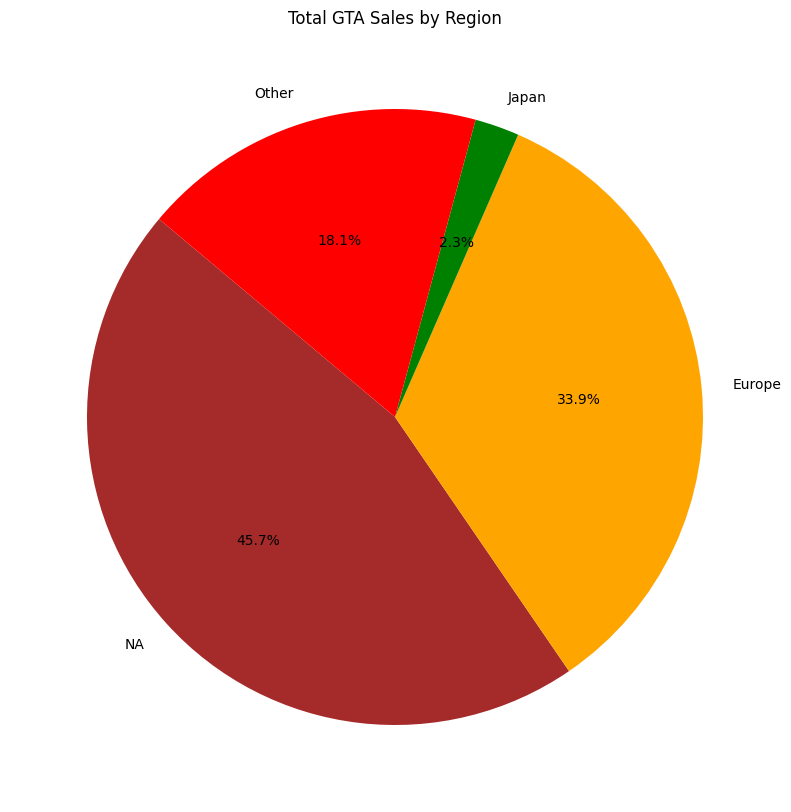

In [38]:
import matplotlib.pyplot as plt


# Sum sales in each region
total_sales = {
    "NA": gta_games["NA_Sales"].sum(),
    "Europe": gta_games["EU_Sales"].sum(),
    "Japan": gta_games["JP_Sales"].sum(),
    "Other": gta_games["Other_Sales"].sum()
}


plt.figure(figsize=(10,10))
plt.pie(
    total_sales.values(),
    labels=total_sales.keys(),
    autopct='%1.1f%%',    # showing in percentages
    startangle=140,
    colors=["brown", "orange", "green", "red"]
)
plt.title("Total GTA Sales by Region")
plt.show()